### Mini batch Task01
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [75]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [5]:
d_df['cut'].value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [17]:
d_df['clarity'].value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder

dd = d_df.copy()
columns = ['cut','clarity', 'color']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(dd[column])
    label_encoders[column] = encoder.classes_
    dd[column] = result

# label_encoders

In [60]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(dd[['color']])

dd = pd.concat([dd, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
dd

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,1,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,2,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,3,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,4,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,5,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,53940,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,53941,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,53942,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [77]:
# dd = dd.drop(labels=['color','Unnamed: 0'], axis=1)
dd = dd.drop(labels=['Unnamed: 0'], axis=1)
dd

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,1,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,2,2,59.8,62.0,2756,5.74,5.73,3.43


In [62]:
dd.columns = ['carat', 
                    'cut', 
                    'clarity', 
                    'depth', 
                    'table', 
                    'price', 
                    'x', 
                    'y', 
                    'z', 
                    'c_D',
                    'c_E', 
                    'c_F', 
                    'c_G', 
                    'c_H', 
                    'c_I',
                    'c_J']

dd

,carat,cut,clarity,depth,table,price,x,y,z,c_D,c_E,c_F,c_G,c_H,c_I,c_J
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'c_D'}>,
        <Axes: title={'center': 'c_E'}>, <Axes: title={'center': 'c_F'}>],
       [<Axes: title={'center': 'c_G'}>, <Axes: title={'center': 'c_H'}>,
        <Axes: title={'center': 'c_I'}>, <Axes: title={'center': 'c_J'}>]],
      dtype=object)

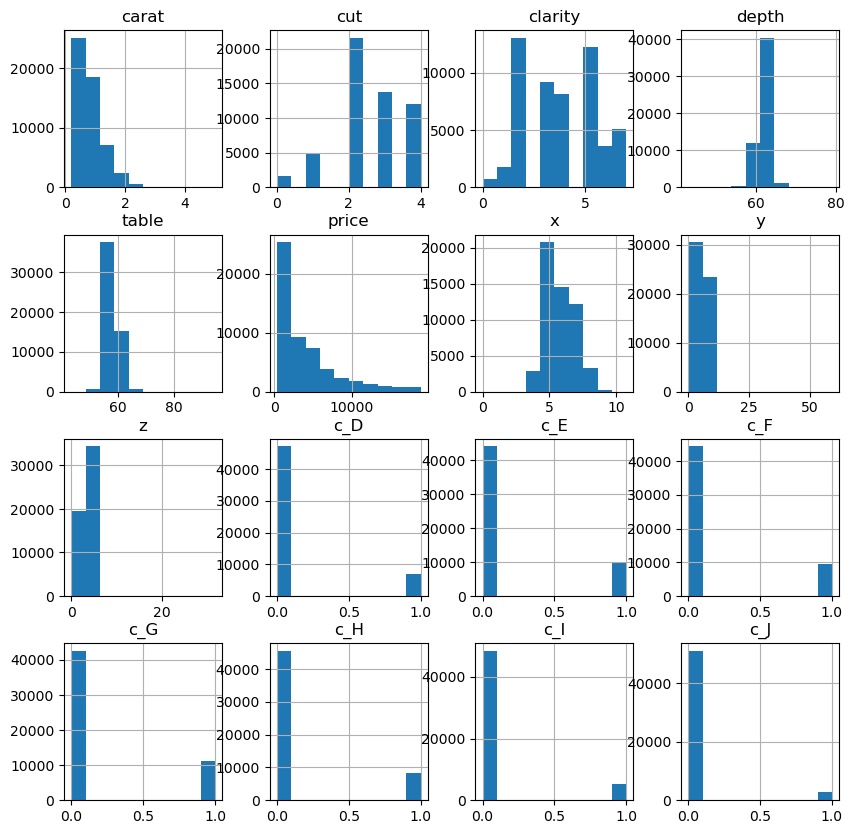

In [31]:
dd.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'c_D'}>,
        <Axes: title={'center': 'c_E'}>, <Axes: title={'center': 'c_F'}>],
       [<Axes: title={'center': 'c_G'}>, <Axes: title={'center': 'c_H'}>,
        <Axes: title={'center': 'c_I'}>, <Axes: title={'center': 'c_J'}>]],
      dtype=object)

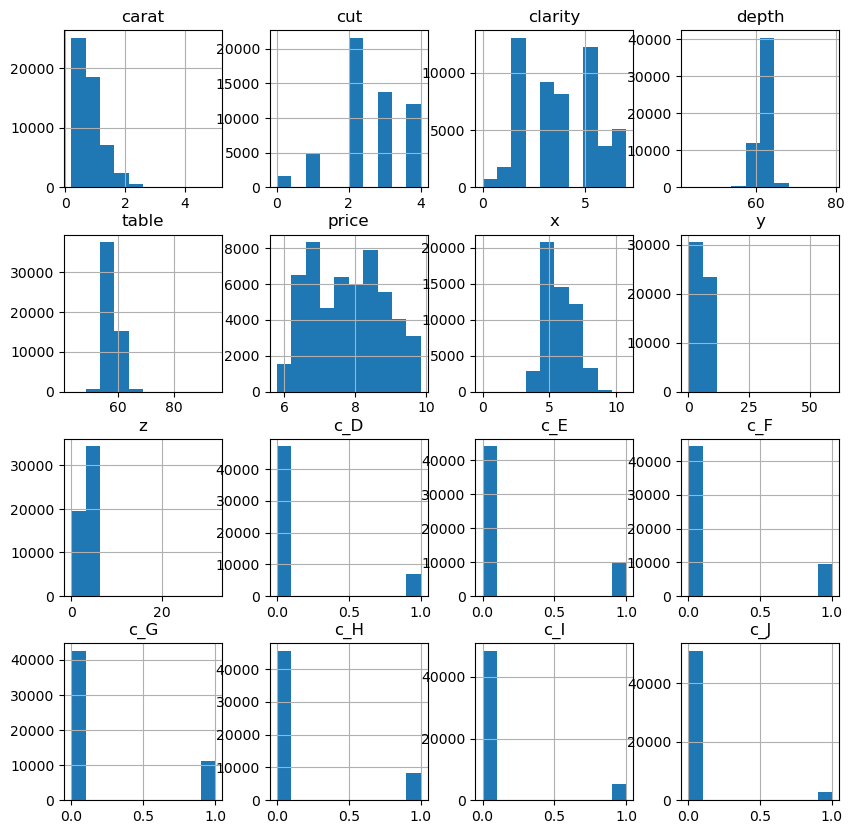

In [63]:
dd.loc[:, 'price'] = np.log1p(dd['price'])
dd.hist(figsize=(10, 10))

In [44]:
# from sklearn.preprocessing import StandardScaler

# features = dd['price']

# features_2d = np.array(dd.price).reshape(-1, 1)

# std = StandardScaler()
# std_features = std.fit_transform(features_2d)
# std_under_h_df = pd.DataFrame(std_features, columns=['price_scaled'])


# for column in std_under_h_df.columns:
#     std_under_h_df.drop(
#         std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
#         axis=0, 
#         inplace=True)

# for column in std_under_h_df.columns:
#     print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')


price_scaled: 0건


In [78]:
dd['price'] = dd.pop('price')

In [53]:
dd

,carat,cut,clarity,depth,table,x,y,z,c_D,c_E,c_F,c_G,c_H,c_I,c_J,price
0,0.23,2,3,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0,5.789960
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,0,0,5.789960
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0,5.793014
3,0.29,3,5,62.4,58.0,4.20,4.23,2.63,0,0,0,0,0,1,0,5.814131
4,0.31,1,3,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,0,1,5.817111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,6.15,6.12,3.74,0,0,0,0,1,0,0,7.922261
53939,0.75,2,3,62.2,55.0,5.83,5.87,3.64,1,0,0,0,0,0,0,7.922261
53940,0.71,3,2,60.5,55.0,5.79,5.74,3.49,0,1,0,0,0,0,0,7.921898
53941,0.71,3,2,59.8,62.0,5.74,5.73,3.43,0,0,1,0,0,0,0,7.921898


In [79]:
dd.corr()['price'].sort_values(ascending=False)[1:]

carat      0.921591
x          0.884433
y          0.865419
z          0.861249
color      0.172520
table      0.127118
cut        0.039847
depth     -0.010630
clarity   -0.071525
Name: price, dtype: float64

In [80]:
columns = ['x', 'y', 'z', 'carat', 'color', 'clarity', 'price']
dd = dd.loc[:, columns]
dd

,x,y,z,carat,color,clarity,price
0,3.95,3.98,2.43,0.23,1,3,326
1,3.89,3.84,2.31,0.21,1,2,326
2,4.05,4.07,2.31,0.23,1,4,327
3,4.20,4.23,2.63,0.29,5,5,334
4,4.34,4.35,2.75,0.31,6,3,335
...,...,...,...,...,...,...,...
53938,6.15,6.12,3.74,0.86,4,3,2757
53939,5.83,5.87,3.64,0.75,0,3,2757
53940,5.79,5.74,3.49,0.71,1,2,2756
53941,5.74,5.73,3.43,0.71,2,2,2756


In [85]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = dd.iloc[:, :-1], dd.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=5000, shuffle=True)

l_r = Linear(6, 1)

optimizer = SGD(l_r.parameters(), lr=0.000001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/9, W1: 42.8716, W2: 43.2392, W3: 26.8851, W4: 8.0636, W5: 18.3612, W6: 23.0702, b: 6.1696
loss: 25003548.0
Epoch: 100/1000, Batch: 2/9, W1: 42.915, W2: 43.2826, W3: 26.9119, W4: 8.0718, W5: 18.3794, W6: 23.0934, b: 6.1759
loss: 24679078.0
Epoch: 100/1000, Batch: 3/9, W1: 42.9572, W2: 43.3248, W3: 26.9379, W4: 8.0798, W5: 18.3974, W6: 23.1158, b: 6.182
loss: 23827262.0
Epoch: 100/1000, Batch: 4/9, W1: 43.0012, W2: 43.3687, W3: 26.965, W4: 8.0883, W5: 18.4158, W6: 23.1393, b: 6.1883
loss: 25188090.0
Epoch: 100/1000, Batch: 5/9, W1: 43.0454, W2: 43.4129, W3: 26.9922, W4: 8.0967, W5: 18.4341, W6: 23.163, b: 6.1947
loss: 25224256.0
Epoch: 100/1000, Batch: 6/9, W1: 43.0903, W2: 43.4578, W3: 27.0199, W4: 8.1053, W5: 18.453, W6: 23.1868, b: 6.2012
loss: 26316944.0
Epoch: 100/1000, Batch: 7/9, W1: 43.1346, W2: 43.5021, W3: 27.0472, W4: 8.1139, W5: 18.472, W6: 23.2102, b: 6.2076
loss: 25247064.0
Epoch: 100/1000, Batch: 8/9, W1: 43.1793, W2: 43.5467, W3: 27.0748, W4: 8.1

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [ ]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [ ]:
get_evaluation(y_test, prediction)

### OLS (Ordinary Least Square)
- 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 여러 통계 테스트를 수행하는 클래스 여러 개와 기능을 제공한다.
- P >|t| (P-value) : 해당 독립변수가 0.05보다 작으면 종속 변수에 영향을 미치는 것이 유의미하다라는 것을 뜻한다.
- Durbin-Watson: 보통 1.5 ~ 2.5사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sub>2</sub>값을 유지 또는 개선하는 방향으로만 수행해야 한다.

### VIF (Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src='./images/multicollinearity.png'>